In [0]:
import pandas as pd

In [0]:
url='https://raw.githubusercontent.com/mirkaoJRC/MaltratoALaMujer/master/dasettt.csv'
df=pd.read_csv(url)

In [3]:
print(df.head(7))

   Encargado Frec_insultosCasa  ...      EnojoDePareja malltrato
0     padres       MuchasVeces  ...    ProbAlcoholicos        si
1     padres        pocasVeces  ...     ProbEconomicos        no
2  parientes        pocasVeces  ...    ProbAlcoholicos        no
3  parientes       MuchasVeces  ...  ProbSentimentales        no
4     padres        Norecuerda  ...  ProbSentimentales        no
5  parientes        Norecuerda  ...    ProbAlcoholicos        no
6  parientes        pocasVeces  ...    ProbAlcoholicos        no

[7 rows x 9 columns]


In [0]:
from sklearn import tree
import pydotplus
from IPython.display import Image

In [5]:
one_hot_data=pd.get_dummies(df[ ['Encargado','Frec_insultosCasa','ViolenciaCasa','ExistenciaMaltratoPareja','ExistenciaDemaltratoSuegra','MotivoDeJuntarse','EdadJunte','EnojoDePareja'
]])
one_hot_data

,Encargado_padres,Encargado_parientes,Frec_insultosCasa_MuchasVeces,Frec_insultosCasa_NoPaso,Frec_insultosCasa_Norecuerda,Frec_insultosCasa_pocasVeces,ViolenciaCasa_Amenzar,ViolenciaCasa_Maltrato,ViolenciaCasa_NoOcurrio,ExistenciaMaltratoPareja_no,ExistenciaMaltratoPareja_noSabe,ExistenciaMaltratoPareja_si,ExistenciaDemaltratoSuegra_no,ExistenciaDemaltratoSuegra_noSabe,ExistenciaDemaltratoSuegra_si,MotivoDeJuntarse_amor,MotivoDeJuntarse_embarazo,MotivoDeJuntarse_presion,EdadJunte_entre25yentre35y605,EdadJunte_entre35y60,EdadJunte_mayores60,EdadJunte_menorentre25yentre35y6055,EnojoDePareja_ProbAlcoholicos,EnojoDePareja_ProbEconomicos,EnojoDePareja_ProbSentimentales,EnojoDePareja_ProbSocializacion
0,1,0,1,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,1,1,0,0,0
1,1,0,0,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0
2,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0
3,0,1,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0
4,1,0,0,0,1,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1
222,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0
223,1,0,0,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0
224,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0


In [0]:
#clasificador de descision Tree
clf=tree.DecisionTreeClassifier()
#Entrenamos
clf_train=clf.fit(one_hot_data,df['malltrato'])

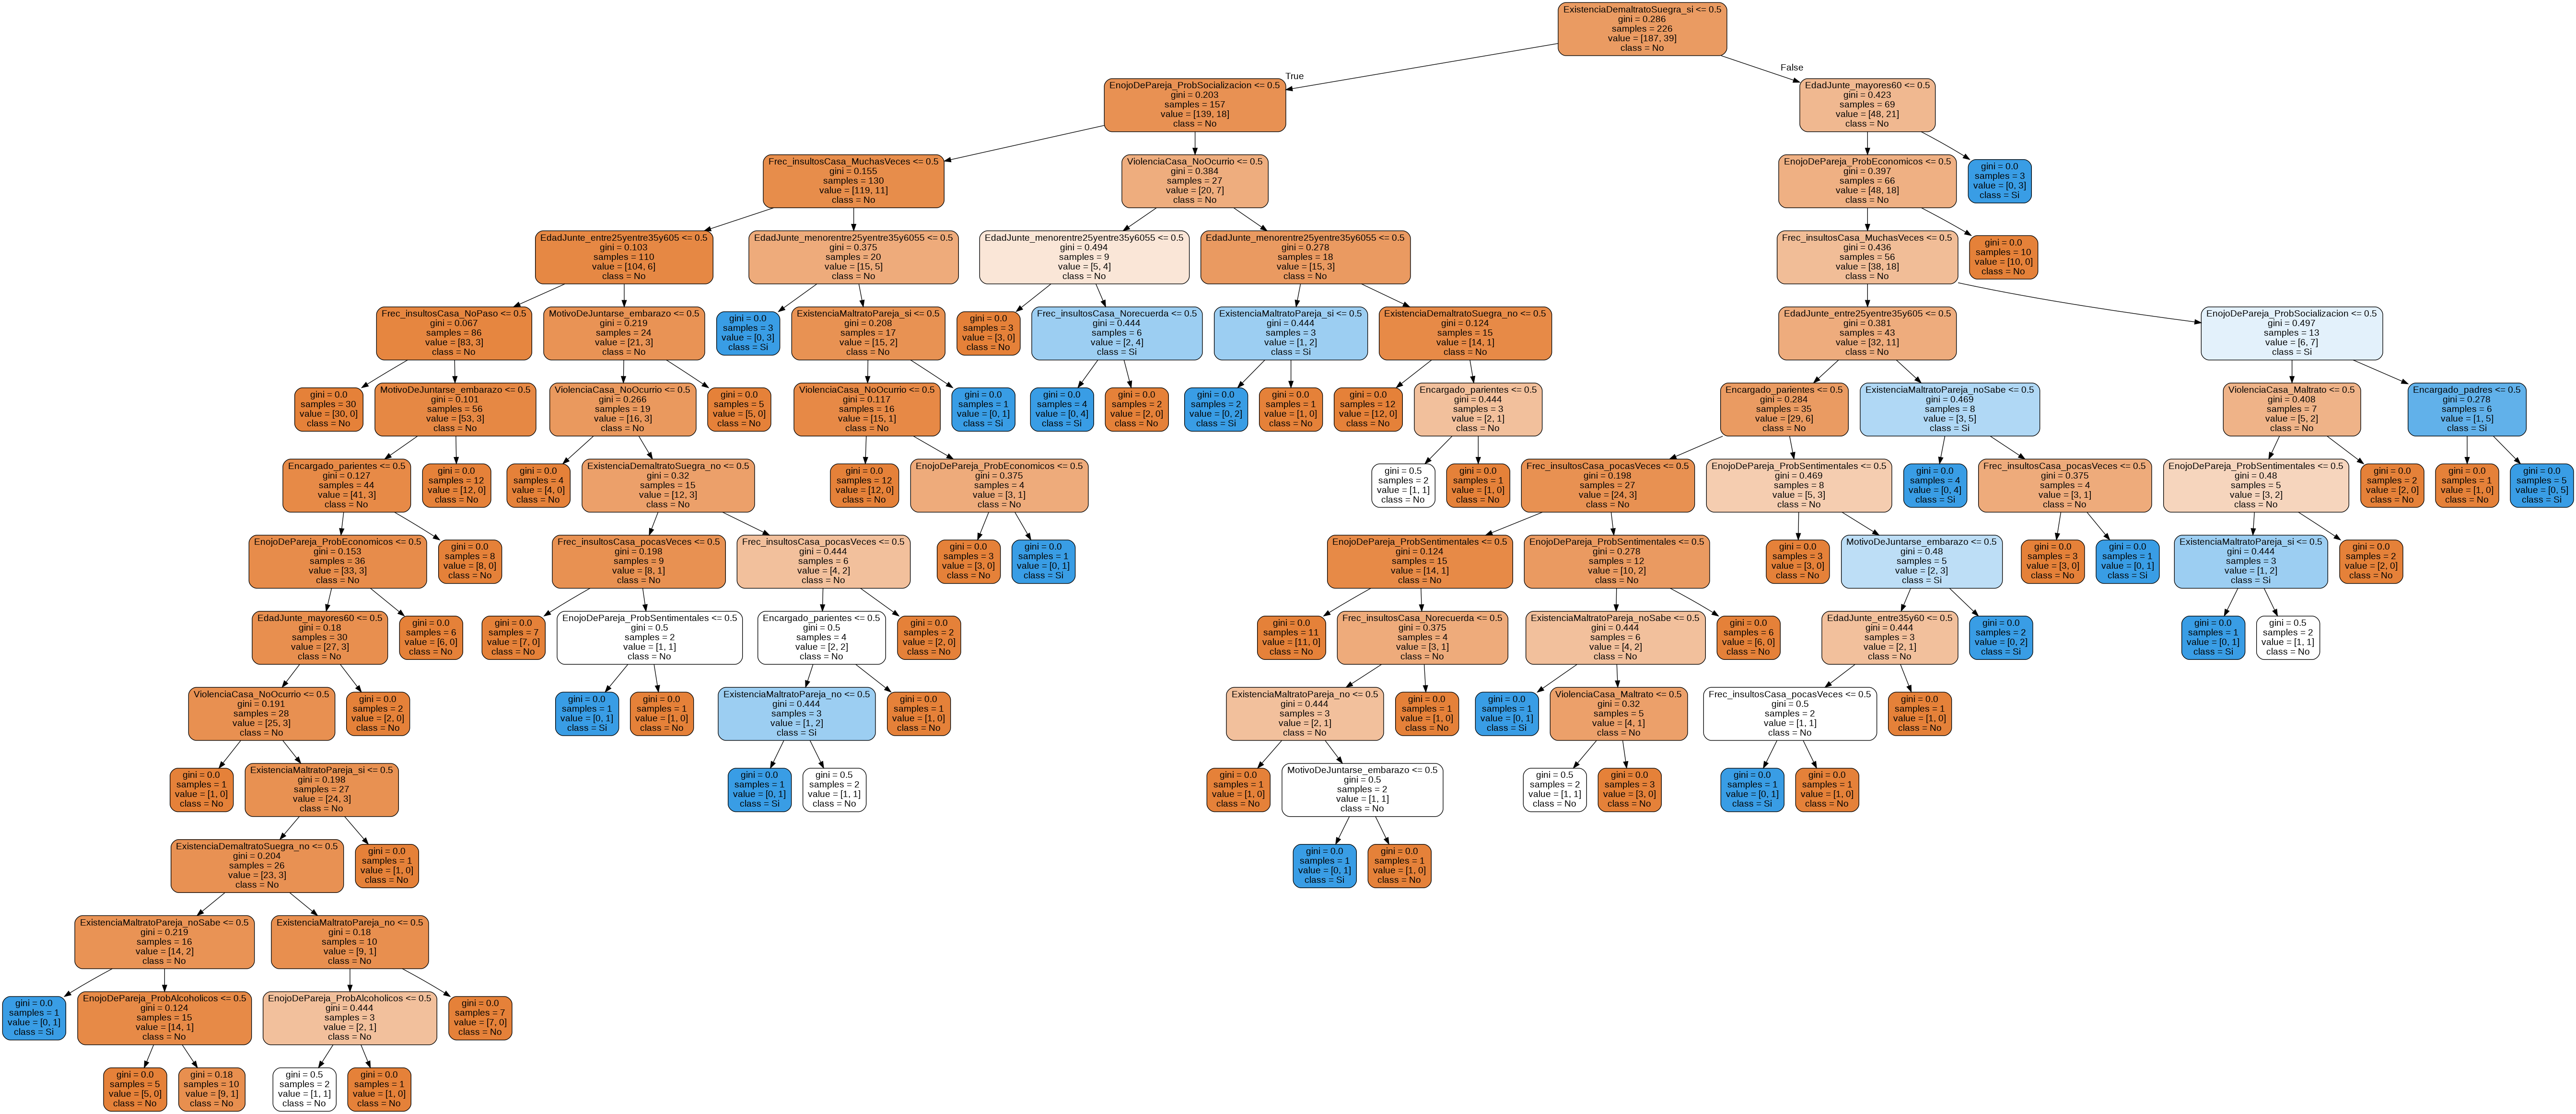

In [7]:
dot_data=tree.export_graphviz(clf_train,out_file=None,feature_names=list(one_hot_data.columns.values),class_names=['No','Si'],rounded=True,filled=True)
graph=pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [0]:
from sklearn.tree import DecisionTreeClassifier
#from sklearn.datsets 
#import load_breast_cancer,load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
import graphviz
import matplotlib.pyplot as plt
import numpy as np

In [0]:
url='https://raw.githubusercontent.com/mirkaoJRC/MaltratoALaMujer/master/base.csv'
df1=pd.read_csv(url)

In [10]:
data=pd.get_dummies(df1[['S2_2','S2_3','S2_5','S2_6','S2_7','S3_1','S3_2','S3_3','S3_8']])
data
target=pd.get_dummies(df1[['S1_9']])
target

,S1_9
0,2
1,1
2,1
3,1
4,1
...,...
221,1
222,1
223,1
224,1


In [0]:
X_entrenamiento,X_test,y_entrenamiento,y_test=train_test_split(data,target)

In [0]:
arbol=DecisionTreeClassifier()

In [13]:
arbol.fit(X_entrenamiento,y_entrenamiento)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [14]:
arbol.score(X_test,y_test)

0.6491228070175439

In [15]:
arbol.score(X_entrenamiento,y_entrenamiento)

0.9940828402366864

In [16]:
#caso extremadamente peligroso
#Encargado=pariente,Frec_insultosCasa=muchas,ViolenciaCasas=maltrato,amenzas,ExistenciaMaltratoPareja=si,ExistenciaDemaltratoSuegra=si,MotivoDeJuntarse=obligacion,EdadJunte=25entre30,EnojoDePareja=celos,borracherra
prediction=clf_train.predict([[1,0,1,0,0,0,1,1,0,1,0,0,0,0,0,1,1,1,1,0,0,0,1,0,1,0]])
prediction

array(['si'], dtype=object)

In [17]:
#caso no péligroso
#Encargado=padre,Frec_insultosCasa=nunca,ViolenciaCasas=no,ExistenciaMaltratoPareja=no,ExistenciaDemaltratoSuegra=no,MotivoDeJuntarse=amor,EdadJunte=25entre30,EnojoDeParejaninguna
prediction=clf_train.predict([[1,0,0,1,0,0,0,0,1,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0]])
prediction

array(['no'], dtype=object)